# keras-nn-tutorial

Basic tutorial for training feed-forward neural networks with the Keras library. This tutorial is an extension of: https://github.com/HelgiHelgason/genetic-nn-tutorial

Dependencies are Tensorflow and Keras:

pip install tensorflow
pip install keras

Keras is a high-level deep learning library that takes care of loading Tensorflow by itself, to Tensorflow is never explicitly used in this code. Keras also works with other back-ends than Tensorflow.


In [1]:
# Note that we only have very basic dependencies
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


In [2]:
# Our dataset
dataset = []

# Where to start the X's
x_runner = -4.0
increment = 0.04

# Generate the dataset, we're going to learn the cos(x) function
for i in range(200):
    dataset.append([x_runner, math.cos(x_runner)])
    x_runner += increment

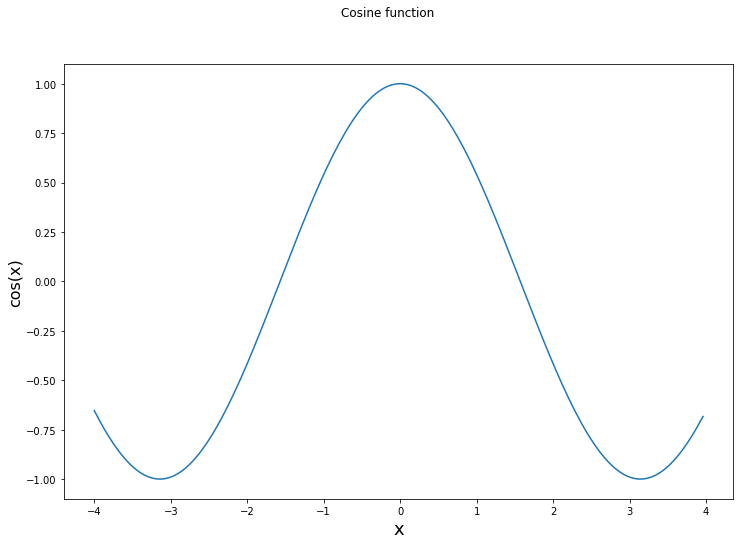

In [3]:
# Plot the whole dataset
fig = plt.figure(figsize=(12, 8))
plt.plot(list(item[0] for item in dataset), list(item[1] for item in dataset))
fig.suptitle('Cosine function')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


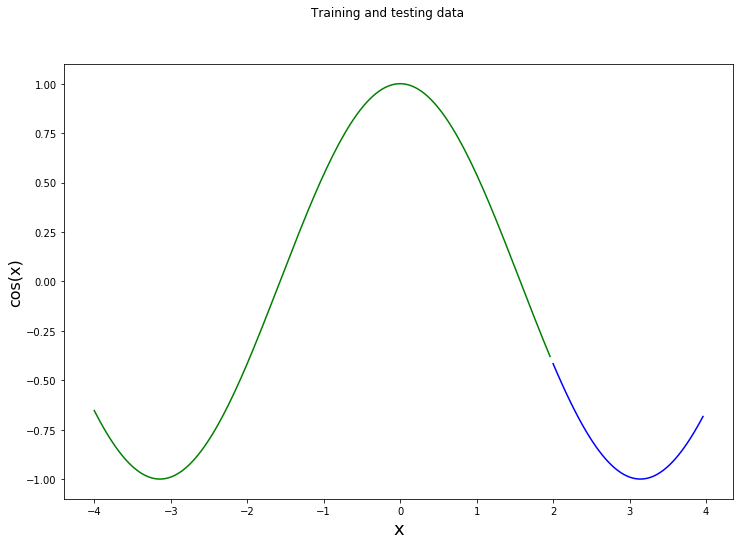

In [4]:
# Split into training and testing sets
training_dataset = dataset[:150]
testing_dataset = dataset[-50:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data')
plt.plot(x_training, y_training, color='green')
plt.plot(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


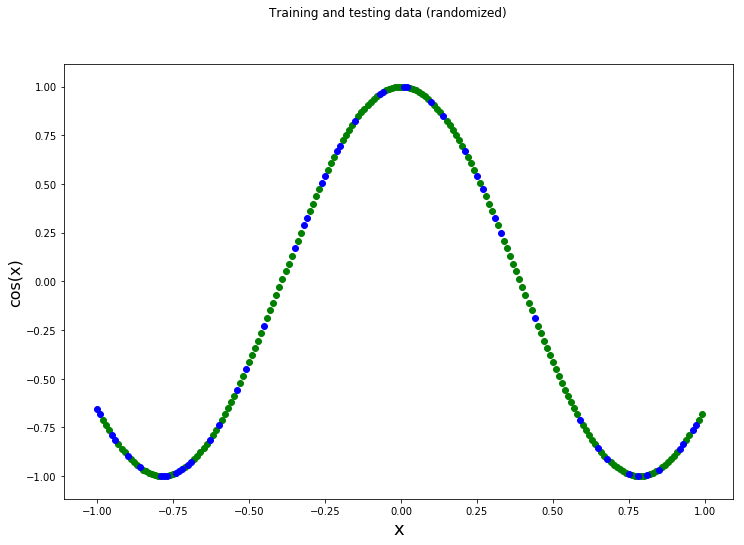

In [5]:
# Shuffle the dataset to make the training and testing sets more evenly distributed
random.shuffle(dataset)

# Redo the split
# Split into training and testing sets
training_dataset = dataset[:150]
testing_dataset = dataset[-50:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Normalize X values
for i in range(len(x_training)):
    x_training[i] = x_training[i] / (200*increment - 100*increment)

for i in range(len(x_testing)):
    x_testing[i] = x_testing[i] / (200*increment - 100*increment)


# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data (randomized)')
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


In [6]:
# Create our model. Sequential means that we will gradually add things to our model, from input to output.
model = Sequential()

# We need to add our hidden layer. Like before, we use RELU and have only one input. 
# Dense is a type neural network layer that is fully connected to the inputs.
# Note that the input layer is implicitly created.
model.add(Dense(units=20, activation='relu', input_dim=1))

# Then we create our output layer. It uses linear activitation like before.
model.add(Dense(units=1, activation='linear'))

# With all layers in place, Keras will compile the model and make it ready for use.
# We will use a stochastic gradient descent (SGD) optimizer and use mean-squared error (MSE) to 
# measure model quality. Note that the previous tutorial used sum-squared error (SSE).
# They are very similar but Keras does not support SSE.
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Here we perform the model training/learning.
model.fit(x_training, y_training, epochs=1000, batch_size=16)

Epoch 1/1000
150/150 [==============================] - 0s 909us/step - loss: 0.7584 - acc: 0.0000e+00
Epoch 2/1000
150/150 [==============================] - 0s 146us/step - loss: 0.7128 - acc: 0.0000e+00
Epoch 3/1000
150/150 [==============================] - 0s 182us/step - loss: 0.6713 - acc: 0.0000e+00
Epoch 4/1000
150/150 [==============================] - 0s 160us/step - loss: 0.6356 - acc: 0.0000e+00
Epoch 5/1000
150/150 [==============================] - 0s 145us/step - loss: 0.6067 - acc: 0.0000e+00
Epoch 6/1000
150/150 [==============================] - 0s 197us/step - loss: 0.5795 - acc: 0.0000e+00
Epoch 7/1000
150/150 [==============================] - 0s 186us/step - loss: 0.5573 - acc: 0.0000e+00
Epoch 8/1000
150/150 [==============================] - 0s 258us/step - loss: 0.5371 - acc: 0.0000e+00
Epoch 9/1000
150/150 [==============================] - 0s 106us/step - loss: 0.5195 - acc: 0.0000e+00
Epoch 10/1000
150/150 [==============================] - 0s 118us/step - 

150/150 [==============================] - 0s 85us/step - loss: 0.0677 - acc: 0.0067
Epoch 81/1000
150/150 [==============================] - 0s 152us/step - loss: 0.0662 - acc: 0.0067
Epoch 82/1000
150/150 [==============================] - 0s 82us/step - loss: 0.0645 - acc: 0.0067
Epoch 83/1000
150/150 [==============================] - 0s 119us/step - loss: 0.0630 - acc: 0.0067
Epoch 84/1000
150/150 [==============================] - 0s 115us/step - loss: 0.0615 - acc: 0.0067
Epoch 85/1000
150/150 [==============================] - 0s 115us/step - loss: 0.0600 - acc: 0.0067
Epoch 86/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0587 - acc: 0.0067
Epoch 87/1000
150/150 [==============================] - 0s 111us/step - loss: 0.0575 - acc: 0.0067
Epoch 88/1000
150/150 [==============================] - 0s 129us/step - loss: 0.0563 - acc: 0.0067
Epoch 89/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0553 - acc: 0.0067
Epoch 90/1000
15

150/150 [==============================] - 0s 96us/step - loss: 0.0324 - acc: 0.0067
Epoch 162/1000
150/150 [==============================] - 0s 129us/step - loss: 0.0321 - acc: 0.0067
Epoch 163/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0321 - acc: 0.0067
Epoch 164/1000
150/150 [==============================] - ETA: 0s - loss: 0.0377 - acc: 0.0000e+0 - 0s 105us/step - loss: 0.0320 - acc: 0.0067
Epoch 165/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0321 - acc: 0.0067
Epoch 166/1000
150/150 [==============================] - 0s 118us/step - loss: 0.0317 - acc: 0.0067
Epoch 167/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0319 - acc: 0.0067
Epoch 168/1000
150/150 [==============================] - 0s 106us/step - loss: 0.0316 - acc: 0.0067
Epoch 169/1000
150/150 [==============================] - 0s 117us/step - loss: 0.0315 - acc: 0.0067
Epoch 170/1000
150/150 [==============================] - 0s 117us

150/150 [==============================] - 0s 93us/step - loss: 0.0258 - acc: 0.0067
Epoch 242/1000
150/150 [==============================] - 0s 116us/step - loss: 0.0253 - acc: 0.0067
Epoch 243/1000
150/150 [==============================] - 0s 64us/step - loss: 0.0257 - acc: 0.0067
Epoch 244/1000
150/150 [==============================] - 0s 88us/step - loss: 0.0255 - acc: 0.0067
Epoch 245/1000
150/150 [==============================] - 0s 116us/step - loss: 0.0252 - acc: 0.0067
Epoch 246/1000
150/150 [==============================] - 0s 147us/step - loss: 0.0251 - acc: 0.0067
Epoch 247/1000
150/150 [==============================] - 0s 192us/step - loss: 0.0249 - acc: 0.0067
Epoch 248/1000
150/150 [==============================] - 0s 131us/step - loss: 0.0250 - acc: 0.0067
Epoch 249/1000
150/150 [==============================] - 0s 141us/step - loss: 0.0249 - acc: 0.0067
Epoch 250/1000
150/150 [==============================] - 0s 129us/step - loss: 0.0248 - acc: 0.0067
Epoch 25

150/150 [==============================] - 0s 82us/step - loss: 0.0189 - acc: 0.0067
Epoch 323/1000
150/150 [==============================] - 0s 143us/step - loss: 0.0187 - acc: 0.0067
Epoch 324/1000
150/150 [==============================] - 0s 72us/step - loss: 0.0186 - acc: 0.0067
Epoch 325/1000
150/150 [==============================] - 0s 123us/step - loss: 0.0186 - acc: 0.0067
Epoch 326/1000
150/150 [==============================] - 0s 125us/step - loss: 0.0183 - acc: 0.0067
Epoch 327/1000
150/150 [==============================] - 0s 242us/step - loss: 0.0183 - acc: 0.0067
Epoch 328/1000
150/150 [==============================] - 0s 90us/step - loss: 0.0182 - acc: 0.0067
Epoch 329/1000
150/150 [==============================] - 0s 89us/step - loss: 0.0184 - acc: 0.0067
Epoch 330/1000
150/150 [==============================] - 0s 111us/step - loss: 0.0185 - acc: 0.0067
Epoch 331/1000
150/150 [==============================] - 0s 112us/step - loss: 0.0181 - acc: 0.0067
Epoch 332

150/150 [==============================] - 0s 122us/step - loss: 0.0130 - acc: 0.0067
Epoch 404/1000
150/150 [==============================] - 0s 123us/step - loss: 0.0128 - acc: 0.0067
Epoch 405/1000
150/150 [==============================] - 0s 70us/step - loss: 0.0129 - acc: 0.0067
Epoch 406/1000
150/150 [==============================] - 0s 139us/step - loss: 0.0130 - acc: 0.0067
Epoch 407/1000
150/150 [==============================] - 0s 119us/step - loss: 0.0127 - acc: 0.0067
Epoch 408/1000
150/150 [==============================] - 0s 115us/step - loss: 0.0127 - acc: 0.0067
Epoch 409/1000
150/150 [==============================] - 0s 168us/step - loss: 0.0126 - acc: 0.0067
Epoch 410/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0126 - acc: 0.0067
Epoch 411/1000
150/150 [==============================] - 0s 114us/step - loss: 0.0125 - acc: 0.0067
Epoch 412/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0125 - acc: 0.0067
Epoch 

150/150 [==============================] - 0s 80us/step - loss: 0.0085 - acc: 0.0067
Epoch 485/1000
150/150 [==============================] - 0s 160us/step - loss: 0.0085 - acc: 0.0067
Epoch 486/1000
150/150 [==============================] - 0s 94us/step - loss: 0.0084 - acc: 0.0067
Epoch 487/1000
150/150 [==============================] - 0s 110us/step - loss: 0.0084 - acc: 0.0067
Epoch 488/1000
150/150 [==============================] - 0s 123us/step - loss: 0.0083 - acc: 0.0067
Epoch 489/1000
150/150 [==============================] - 0s 103us/step - loss: 0.0083 - acc: 0.0067
Epoch 490/1000
150/150 [==============================] - 0s 129us/step - loss: 0.0082 - acc: 0.0067
Epoch 491/1000
150/150 [==============================] - 0s 92us/step - loss: 0.0082 - acc: 0.0067
Epoch 492/1000
150/150 [==============================] - 0s 117us/step - loss: 0.0084 - acc: 0.0067
Epoch 493/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0081 - acc: 0.0067
Epoch 49

150/150 [==============================] - 0s 115us/step - loss: 0.0056 - acc: 0.0067
Epoch 565/1000
150/150 [==============================] - 0s 123us/step - loss: 0.0055 - acc: 0.0067
Epoch 566/1000
150/150 [==============================] - 0s 158us/step - loss: 0.0054 - acc: 0.0067
Epoch 567/1000
150/150 [==============================] - 0s 115us/step - loss: 0.0056 - acc: 0.0067
Epoch 568/1000
150/150 [==============================] - 0s 138us/step - loss: 0.0054 - acc: 0.0067
Epoch 569/1000
150/150 [==============================] - 0s 237us/step - loss: 0.0054 - acc: 0.0067
Epoch 570/1000
150/150 [==============================] - 0s 241us/step - loss: 0.0053 - acc: 0.0067
Epoch 571/1000
150/150 [==============================] - 0s 164us/step - loss: 0.0053 - acc: 0.0067
Epoch 572/1000
150/150 [==============================] - 0s 116us/step - loss: 0.0053 - acc: 0.0067
Epoch 573/1000
150/150 [==============================] - 0s 112us/step - loss: 0.0055 - acc: 0.0067
Epoch

150/150 [==============================] - 0s 84us/step - loss: 0.0037 - acc: 0.0067
Epoch 646/1000
150/150 [==============================] - 0s 70us/step - loss: 0.0036 - acc: 0.0067
Epoch 647/1000
150/150 [==============================] - 0s 59us/step - loss: 0.0036 - acc: 0.0067
Epoch 648/1000
150/150 [==============================] - 0s 62us/step - loss: 0.0037 - acc: 0.0067
Epoch 649/1000
150/150 [==============================] - 0s 69us/step - loss: 0.0036 - acc: 0.0067
Epoch 650/1000
150/150 [==============================] - 0s 57us/step - loss: 0.0035 - acc: 0.0067
Epoch 651/1000
150/150 [==============================] - 0s 61us/step - loss: 0.0036 - acc: 0.0067
Epoch 652/1000
150/150 [==============================] - 0s 61us/step - loss: 0.0037 - acc: 0.0067
Epoch 653/1000
150/150 [==============================] - 0s 62us/step - loss: 0.0035 - acc: 0.0067   
Epoch 654/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0034 - acc: 0.0067
Epoch 655/10

150/150 [==============================] - 0s 64us/step - loss: 0.0023 - acc: 0.0067
Epoch 727/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0023 - acc: 0.0067   
Epoch 728/1000
150/150 [==============================] - 0s 64us/step - loss: 0.0023 - acc: 0.0067
Epoch 729/1000
150/150 [==============================] - 0s 92us/step - loss: 0.0023 - acc: 0.0067
Epoch 730/1000
150/150 [==============================] - 0s 96us/step - loss: 0.0023 - acc: 0.0067
Epoch 731/1000
150/150 [==============================] - 0s 61us/step - loss: 0.0022 - acc: 0.0067
Epoch 732/1000
150/150 [==============================] - 0s 85us/step - loss: 0.0022 - acc: 0.0067
Epoch 733/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0022 - acc: 0.0067
Epoch 734/1000
150/150 [==============================] - 0s 76us/step - loss: 0.0023 - acc: 0.0067
Epoch 735/1000
150/150 [==============================] - 0s 90us/step - loss: 0.0023 - acc: 0.0067
Epoch 736/10

150/150 [==============================] - 0s 69us/step - loss: 0.0015 - acc: 0.0067   
Epoch 807/1000
150/150 [==============================] - 0s 70us/step - loss: 0.0015 - acc: 0.0067   
Epoch 808/1000
150/150 [==============================] - 0s 91us/step - loss: 0.0015 - acc: 0.0067
Epoch 809/1000
150/150 [==============================] - 0s 153us/step - loss: 0.0015 - acc: 0.0067
Epoch 810/1000
150/150 [==============================] - 0s 98us/step - loss: 0.0015 - acc: 0.0067   
Epoch 811/1000
150/150 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.0067   
Epoch 812/1000
150/150 [==============================] - 0s 95us/step - loss: 0.0015 - acc: 0.0067   
Epoch 813/1000
150/150 [==============================] - 0s 63us/step - loss: 0.0014 - acc: 0.0067   
Epoch 814/1000
150/150 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 0.0067
Epoch 815/1000
150/150 [==============================] - 0s 69us/step - loss: 0.0015 - acc: 0.0

150/150 [==============================] - 0s 60us/step - loss: 9.9539e-04 - acc: 0.0067
Epoch 887/1000
150/150 [==============================] - 0s 61us/step - loss: 9.9927e-04 - acc: 0.0067
Epoch 888/1000
150/150 [==============================] - 0s 58us/step - loss: 9.6337e-04 - acc: 0.0067
Epoch 889/1000
150/150 [==============================] - 0s 61us/step - loss: 9.7854e-04 - acc: 0.0067
Epoch 890/1000
150/150 [==============================] - 0s 67us/step - loss: 9.6242e-04 - acc: 0.0067
Epoch 891/1000
150/150 [==============================] - 0s 64us/step - loss: 9.6309e-04 - acc: 0.0067
Epoch 892/1000
150/150 [==============================] - 0s 56us/step - loss: 9.5994e-04 - acc: 0.0067
Epoch 893/1000
150/150 [==============================] - 0s 56us/step - loss: 0.0010 - acc: 0.0067
Epoch 894/1000
150/150 [==============================] - 0s 64us/step - loss: 9.2145e-04 - acc: 0.0067
Epoch 895/1000
150/150 [==============================] - 0s 74us/step - loss: 9.28

150/150 [==============================] - 0s 85us/step - loss: 6.6647e-04 - acc: 0.0067
Epoch 965/1000
150/150 [==============================] - 0s 166us/step - loss: 7.0957e-04 - acc: 0.0067
Epoch 966/1000
150/150 [==============================] - ETA: 0s - loss: 8.8264e-05 - acc: 0.0000e+0 - 0s 237us/step - loss: 7.1836e-04 - acc: 0.0067
Epoch 967/1000
150/150 [==============================] - 0s 97us/step - loss: 6.5205e-04 - acc: 0.0067
Epoch 968/1000
150/150 [==============================] - 0s 127us/step - loss: 6.5172e-04 - acc: 0.0067
Epoch 969/1000
150/150 [==============================] - 0s 74us/step - loss: 6.2242e-04 - acc: 0.0067
Epoch 970/1000
150/150 [==============================] - 0s 66us/step - loss: 6.4290e-04 - acc: 0.0067
Epoch 971/1000
150/150 [==============================] - 0s 61us/step - loss: 6.2396e-04 - acc: 0.0067
Epoch 972/1000
150/150 [==============================] - 0s 92us/step - loss: 6.2762e-04 - acc: 0.0067
Epoch 973/1000
150/150 [======

In [ ]:
# Now lets apply the trained model to the both training and testing data.
y_training_results = model.predict(x_training)
y_testing_results = model.predict(x_testing)

In [ ]:
# Plot function currently learned
fig = plt.figure(figsize=(12, 8))
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_training, y_training_results, color='red')
fig.suptitle('Training data versus learned function')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()

In [ ]:
# Plot results vs "ground truth"# Plot re 
fig = plt.figure(figsize=(12, 8))
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.scatter(x_testing, y_testing_results, color='red')
fig.suptitle('Training, testing and result data')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()